In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import cmocean.cm as cmo
#import cartopy.crs as ccrs # these ones are not needed
#import cartopy.feature as cfeature  #these ones are not needed
import matplotlib as mpl
import gsw
import warnings
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings("ignore")
#import OWSLib
font = {'size'   : 13}
mpl.rc('font', **font)

In [4]:
station_info = pd.read_csv('fullfix_ctd_data_2021.csv') # import your data

In [5]:
station_info #look at data

,Station,prDM,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
0,ST_10_tue,1.1,97934.210526,97934.210526,NaN,NaN,NaN,15.067847,15.067847,2.925932,...,2289.210526,15.062037,15.062037,2.935356,2.935356,2.798332,2.798332,NaN,NaN,NaN
1,ST_10_tue,1.2,99187.050000,99187.050000,NaN,NaN,NaN,15.237593,15.237593,2.965431,...,3542.050000,15.235148,15.235148,2.966966,2.966966,2.723878,2.723878,NaN,NaN,NaN
2,ST_10_tue,1.3,98512.066667,98512.066667,NaN,NaN,NaN,15.266700,15.266700,2.976997,...,2867.066667,15.229873,15.229873,2.970935,2.970935,2.660313,2.660313,NaN,NaN,NaN
3,ST_10_tue,1.4,97237.555556,97237.555556,NaN,NaN,NaN,15.070767,15.070767,2.847167,...,1592.555556,14.982078,14.982078,2.856808,2.856808,2.119389,2.119389,NaN,NaN,NaN
4,ST_10_tue,1.5,97049.222222,97049.222222,NaN,NaN,NaN,15.025544,15.025544,2.863893,...,1404.222222,15.041778,15.041778,2.875044,2.875044,2.312433,2.312433,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,ST_9_wed,42.6,61753.327586,61753.327586,NaN,NaN,NaN,8.685258,8.685258,3.414814,...,3061.327586,NaN,NaN,NaN,NaN,0.542804,0.542804,NaN,NaN,NaN
4046,ST_9_wed,42.7,61763.719298,61763.719298,NaN,NaN,NaN,8.686023,8.686023,3.414892,...,3071.719298,NaN,NaN,NaN,NaN,0.542636,0.542636,NaN,NaN,NaN
4047,ST_9_wed,42.8,61773.500000,61773.500000,NaN,NaN,NaN,8.685831,8.685831,3.414876,...,3081.500000,NaN,NaN,NaN,NaN,0.542181,0.542181,NaN,NaN,NaN
4048,ST_9_wed,42.9,61786.988304,61786.988304,NaN,NaN,NaN,8.687948,8.687948,3.414966,...,3094.988304,NaN,NaN,NaN,NaN,0.541900,0.541900,NaN,NaN,NaN


In [6]:
#separating the years

#ctd_data_2019 = station_info[station_info['Year'] == 2019]
#ctd_data_2020 = station_info[station_info['Year'] == 2020]
ctd_data_2021 = station_info[station_info['Year'] == 2021]
#ctd_data_2022 = station_info[station_info['Year'] == 2022]
#ctd_data_2023 = station_info[station_info['Year'] == 2023]

In [6]:
ctd_data_2021 #look at data

,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,C0,prDM,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
15002,461,461,NaN,NaN,NaN,14.4962,14.4962,2.835362,2.835362,1.016,...,462.0,14.4378,14.4378,2.823225,2.823225,2.7473,2.7473,NaN,NaN,NaN
15003,464,464,NaN,NaN,NaN,14.4643,14.4643,2.828881,2.828881,1.041,...,465.0,14.4410,14.4410,2.823289,2.823289,2.7473,2.7473,NaN,NaN,NaN
15004,466,466,NaN,NaN,NaN,14.4559,14.4559,2.823798,2.823798,1.041,...,467.0,14.4366,14.4366,2.822925,2.822925,2.7460,2.7460,NaN,NaN,NaN
15005,467,467,NaN,NaN,NaN,14.4490,14.4490,2.823424,2.823424,1.016,...,468.0,14.4378,14.4378,2.822711,2.822711,2.7460,2.7460,NaN,NaN,NaN
15006,468,468,NaN,NaN,NaN,14.4641,14.4641,2.823468,2.823468,1.099,...,469.0,14.4386,14.4386,2.822888,2.822888,2.7460,2.7460,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66056,95641,95641,NaN,NaN,NaN,8.6884,8.6884,3.414155,3.414155,39.027,...,5709.0,NaN,NaN,NaN,NaN,0.5431,0.5431,NaN,NaN,NaN
66057,95642,95642,NaN,NaN,NaN,8.6884,8.6884,3.414149,3.414149,39.027,...,5710.0,NaN,NaN,NaN,NaN,0.5431,0.5431,NaN,NaN,NaN
66058,95643,95643,NaN,NaN,NaN,8.6885,8.6885,3.414114,3.414114,39.027,...,5711.0,NaN,NaN,NaN,NaN,0.5431,0.5431,NaN,NaN,NaN
66059,95644,95644,NaN,NaN,NaN,8.6882,8.6882,3.414038,3.414038,38.961,...,5712.0,NaN,NaN,NaN,NaN,0.5431,0.5431,NaN,NaN,NaN


In [8]:
#fix data

ctd_data_2021['Station'].replace({"ST_10_tue":"ST_tue_110", "ST_10_wed":"ST_wed_210",
                                  "ST_1_thu":"ST_thu_31", "ST_1_tue":"ST_tue_11",
                                  "ST_1_wed":"ST_wed_21", "ST_2_thu":"ST_thu_32", 
                                  "ST_2_tue":"ST_tue_12", "ST_2_wed":"ST_wed_22", 
                                  "ST_3_thu":"ST_thu_33", "ST_3_tue":"ST_tue_13", 
                                  "ST_3_wed":"ST_wed_23", "ST_9_thu":"ST_thu_39", 
                                  "ST_9_wed":"ST_wed_29"}, inplace=True) # chaging the names of sattions so the number is 
                                                                         # at the end and also all the sation names have to be
                                                                         # different


# the 2021 dataset doesn't have latitute and longitute data, so I added it manually from the reports

latitude_data = {"ST_tue_110":58.330133, "ST_wed_210":58.337533,"ST_thu_31":58.341017, "ST_tue_11":58.342233,
                 "ST_wed_21":58.34115, "ST_thu_32":58.333467, "ST_tue_12":58.33355, "ST_wed_22":58.332317, 
                 "ST_thu_33":58.328317, "ST_tue_13":58.32865, "ST_wed_23":58.3283, "ST_thu_39":58.338, "ST_wed_29":58.330333}


longitude_data = {"ST_tue_110":11.864017, "ST_wed_210":11.887383,"ST_thu_31":11.899483, "ST_tue_11":11.903433,
                  "ST_wed_21":11.8998, "ST_thu_32":11.875683,"ST_tue_12":11.874717, "ST_wed_22":11.871933, 
                  "ST_thu_33":11.856117, "ST_tue_13":11.8564, "ST_wed_23":11.85485, "ST_thu_39":11.888, 
                  "ST_wed_29":11.864} # Coordinates of ST_thu_9 in the report are wrong; found in ctd data file; 
                                      # neveike nes buvo parasyta ST_thu3_9


# Add latitude values based on the 'STATION' column
ctd_data_2021['latitude'] = ctd_data_2021['Station'].map(latitude_data)
ctd_data_2021['longitude'] = ctd_data_2021['Station'].map(longitude_data)


ctd_data_2021 #look at data


,Station,prDM,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
0,ST_tue_110,1.1,97934.210526,97934.210526,58.330133,11.864017,NaN,15.067847,15.067847,2.925932,...,2289.210526,15.062037,15.062037,2.935356,2.935356,2.798332,2.798332,NaN,NaN,NaN
1,ST_tue_110,1.2,99187.050000,99187.050000,58.330133,11.864017,NaN,15.237593,15.237593,2.965431,...,3542.050000,15.235148,15.235148,2.966966,2.966966,2.723878,2.723878,NaN,NaN,NaN
2,ST_tue_110,1.3,98512.066667,98512.066667,58.330133,11.864017,NaN,15.266700,15.266700,2.976997,...,2867.066667,15.229873,15.229873,2.970935,2.970935,2.660313,2.660313,NaN,NaN,NaN
3,ST_tue_110,1.4,97237.555556,97237.555556,58.330133,11.864017,NaN,15.070767,15.070767,2.847167,...,1592.555556,14.982078,14.982078,2.856808,2.856808,2.119389,2.119389,NaN,NaN,NaN
4,ST_tue_110,1.5,97049.222222,97049.222222,58.330133,11.864017,NaN,15.025544,15.025544,2.863893,...,1404.222222,15.041778,15.041778,2.875044,2.875044,2.312433,2.312433,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,ST_wed_29,42.6,61753.327586,61753.327586,58.330333,11.864000,NaN,8.685258,8.685258,3.414814,...,3061.327586,NaN,NaN,NaN,NaN,0.542804,0.542804,NaN,NaN,NaN
4046,ST_wed_29,42.7,61763.719298,61763.719298,58.330333,11.864000,NaN,8.686023,8.686023,3.414892,...,3071.719298,NaN,NaN,NaN,NaN,0.542636,0.542636,NaN,NaN,NaN
4047,ST_wed_29,42.8,61773.500000,61773.500000,58.330333,11.864000,NaN,8.685831,8.685831,3.414876,...,3081.500000,NaN,NaN,NaN,NaN,0.542181,0.542181,NaN,NaN,NaN
4048,ST_wed_29,42.9,61786.988304,61786.988304,58.330333,11.864000,NaN,8.687948,8.687948,3.414966,...,3094.988304,NaN,NaN,NaN,NaN,0.541900,0.541900,NaN,NaN,NaN


In [17]:
#ctd_data_2021[['longitude', 'STATION']] cia reikejo prachekint kod4l yra nan values longitude'e

In [10]:
#array_2019 = ctd_data_2019.to_xarray().set_coords(['STATION'])
#array_2020 = ctd_data_2020.to_xarray().set_coords(['STATION'])
array_2021 = ctd_data_2021.to_xarray().set_coords(['Station'])
#array_2022 = ctd_data_2020.to_xarray().set_coords(['STATION'])
#array_2023 = ctd_data_2023.to_xarray().set_coords(['STATION'])  # transform the pandas dataframe to an xarray dataset

In [11]:
np.unique(array_2021.Station) # get all the different stations in the dataset by calling on the unique station names

array(['ST_thu_31', 'ST_thu_32', 'ST_thu_33', 'ST_thu_39', 'ST_tue_11',
       'ST_tue_110', 'ST_tue_12', 'ST_tue_13', 'ST_wed_21', 'ST_wed_210',
       'ST_wed_22', 'ST_wed_23', 'ST_wed_29'], dtype=object)

In [14]:
step1 = array_2021.groupby('Station')['ST_thu_31'] # testing functions for the loop
step2 = step1.set_coords('prDM')
step3 = step2.swap_dims({'index':'prDM'})
step4 = step3.sortby('prDM')
step7 = step4.expand_dims({'SStation':['ST_thu_31']})
#step8 = step7.groupby('prDM').mean('prDM')
step9 = step7.interp(prDM=np.arange(0,50.1,0.1))

In [16]:
temp = []

for station in np.unique(array_2021.Station):                # the index in station -> the loop goes throu every station
    
    step1 = array_2021.groupby('Station')[station]           # grouping every station together
    step2 = step1.set_coords('prDM')                 # determin prDM as a coordinate
    step3 = step2.swap_dims({'index':'prDM'})        # replace the index dimension with prDM as a dimention
    step4 = step3.sortby('prDM')                     # sort prDM so that they are in ascended order
    
    step7 = step4.expand_dims({'SStation':[station]}) # adding station as a dimention

#    step8 = step7.groupby('prDM').mean('prDM')       # group the values by prDM groups, them culculate the mean of them

    step9 = step7.interp(prDM=np.arange(0,50.1,0.1)) # now interpolate it (grid it), 
    
    temp.append(step9)
    print(station)
#DS  = xr.concat(temp,dim='Station')


ST_thu_31
ST_thu_32
ST_thu_33
ST_thu_39
ST_tue_11
ST_tue_110
ST_tue_12
ST_tue_13
ST_wed_21
ST_wed_210
ST_wed_22
ST_wed_23
ST_wed_29


In [17]:
DS = xr.concat(temp,dim='SStation')

In [18]:
DS = DS.sel(SStation=["ST_tue_110", "ST_wed_210","ST_thu_31", "ST_tue_11",
                     "ST_wed_21", "ST_thu_32", "ST_tue_12", "ST_wed_22", 
                     "ST_thu_33", "ST_tue_13", "ST_wed_23", "ST_thu_39", "ST_wed_29"])

In [19]:
[int(station[7:]) for station in DS.SStation.values]

[110, 210, 31, 11, 21, 32, 12, 22, 33, 13, 23, 39, 29]

In [20]:
DS['SStation'] = np.array([int(station[7:]) for station in DS.SStation.values])

In [21]:
DS['latitude'] = DS['latitude'].mean('prDM')
DS['longitude'] = DS['longitude'].mean('prDM')


In [22]:
DS['distance'] = ('SStation'), np.zeros(len(DS.Station))

In [23]:
DS['distance'][1:] = np.cumsum(gsw.distance(DS['longitude'],DS['latitude']))/1000

In [24]:
DS = DS.rename({'t090C':'temperature'})

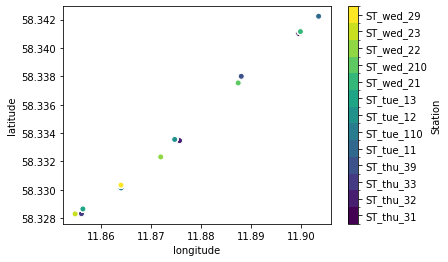

In [25]:
DS.plot.scatter(x='longitude',y='latitude',hue='Station')

In [26]:
DS = DS.set_coords(['longitude','latitude'])

In [27]:
DS_sorted = DS.sortby('longitude') # the stations in the next code have to be in the order of increasing x axis (longitude) 
                                   # so using this to see what is the order
DS_sorted

<xarray.Dataset>
Dimensions:       (SStation: 13, prDM: 501)
Coordinates:
  * SStation      (SStation) int64 23 33 13 29 110 22 12 32 210 39 31 21 11
    index         (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    latitude      (SStation) float64 58.33 58.33 58.33 ... 58.34 58.34 58.34
    longitude     (SStation) float64 11.85 11.86 11.86 11.86 ... 11.9 11.9 11.9
  * prDM          (prDM) float64 0.0 0.1 0.2 0.3 0.4 ... 49.7 49.8 49.9 50.0
    Station       (SStation, prDM) object 'ST_wed_23' ... 'ST_tue_11'
Data variables: (12/33)
    Unnamed: 0.1  (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    Unnamed: 0    (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    timeJ         (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    temperature   (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    T0            (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    c0S/m         (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    ...            ...
    sbeox1V       (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    oxy1          (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    xmiss         (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    potemp090C    (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    sbeox0PS      (SStation, prDM) float64 nan nan nan nan ... nan nan nan nan
    distance      (SStation) float64 5.99 5.851 5.891 9.845 ... 2.398 2.91 2.666

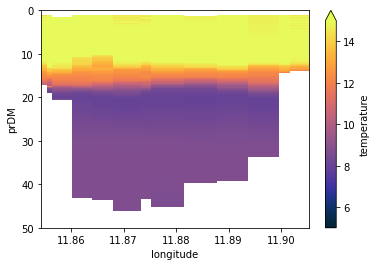

In [28]:
DS.sel(SStation=[23,  33,  13,  29, 110,  22,  12,  32, 210,  39,  31,  21,  11])['temperature'].swap_dims({'SStation':'longitude'}).plot(ylim=(50,0),x='longitude',
                                                                                               cmap='cmo.thermal',
                                                                                               vmin=5,vmax=15)
#all stations have to be with different names and written in row of increasing longitude; vmax and vmin allow to change the limits of colour bar

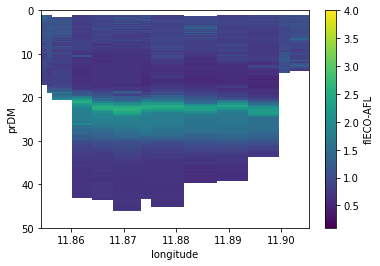

In [30]:
DS.sel(SStation=[23,  33,  13,  29, 110,  22,  
                12,  32, 210,  39,  31,  21,  11])['flECO-AFL'].swap_dims({'SStation':'longitude'}).plot(ylim=(50,0), 
                                                                                                        x='longitude',
                                                                                                        vmin=0.1,vmax=4)

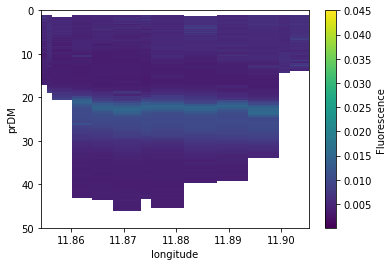

In [26]:
#Same plot with the "fixed" fluoresence data
DS.sel(Station=[23,  33,  13,  29, 110,  22,  
                12,  32, 210,  39,  31,  21,  11])['Fluorescence'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0), 
                                                                                                        x='longitude',
                                                                                                        vmin=0.0001,vmax=0.045)

In [1]:
#Same plot with turbidity
DS.sel(Station=[3, 2, 8, 1])['upoly0'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0),
                                                                            x='longitude',
                                                                            vmin=0,vmax=5)

NameError: name 'DS' is not defined

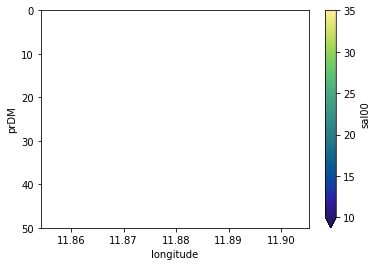

In [48]:
DS.sel(Station=[23,  33,  13,  29, 110,  22,  12,  32, 210,  39,  31,  21,  11])['sal00'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0),x='longitude',
                                                                                               cmap='cmo.haline',
                                                                                               vmin=10,vmax=35)

In [57]:
ds_ew = DS.sel(Station=[1,2,3,4,5,6,8,9,10,14])

In [58]:
ds_ew

<xarray.Dataset>
Dimensions:      (Station: 10, prDM: 501)
Coordinates:
  * Station      (Station) int64 1 2 3 4 5 6 8 9 10 14
    latitude     (Station) float64 58.34 58.34 58.33 58.33 ... 58.32 58.31 58.31
    longitude    (Station) float64 11.9 11.89 11.88 11.87 ... 11.79 11.77 11.74
  * prDM         (prDM) float64 0.0 0.1 0.2 0.3 0.4 ... 49.6 49.7 49.8 49.9 50.0
Data variables: (12/18)
    scan         (prDM, Station) float64 nan 548.2 129.9 nan ... nan nan nan nan
    p            (prDM, Station) float64 nan 0.0 0.0 nan nan ... nan nan nan nan
    temperature  (prDM, Station) float64 nan 18.0 18.41 nan ... nan nan nan nan
    T0           (prDM, Station) float64 nan 18.0 18.41 nan ... nan nan nan nan
    c0S/m        (prDM, Station) float64 nan 0.739 2.317 nan ... nan nan nan nan
    C0           (prDM, Station) float64 nan 0.739 2.317 nan ... nan nan nan nan
    ...           ...
    potemp090C   (prDM, Station) float64 nan 18.0 18.41 nan ... nan nan nan nan
    sal00        (prDM, Station) float64 nan 4.774 16.28 nan ... nan nan nan nan
    sbeox0ML/L   (prDM, Station) float64 nan 6.218 5.245 nan ... nan nan nan nan
    sbeox0PS     (prDM, Station) float64 nan 96.58 87.98 nan ... nan nan nan nan
    flag         (prDM, Station) float64 nan -9.99e-29 -9.99e-29 ... nan nan nan
    distance     (Station) float64 0.0 0.7598 1.546 2.198 ... 7.181 8.291 16.03

In [66]:
DS['SA'] = gsw.SA_from_SP(DS.sal00,DS.prDM,DS.longitude,DS.latitude)
DS['CT'] = gsw.CT_from_t(DS['SA'],DS['temperature'],DS['prDM'])
DS['rho'] = gsw.rho(DS['SA'],DS['CT'],DS['prDM'])


In [90]:
DS['N2'] = ('Station','prDM'), np.zeros((len(DS.Station),len(DS.prDM))) * np.nan
DS['N2'].values[:,1:] = gsw.Nsquared(DS['SA'],DS['CT'],DS['depSM'])[0].T

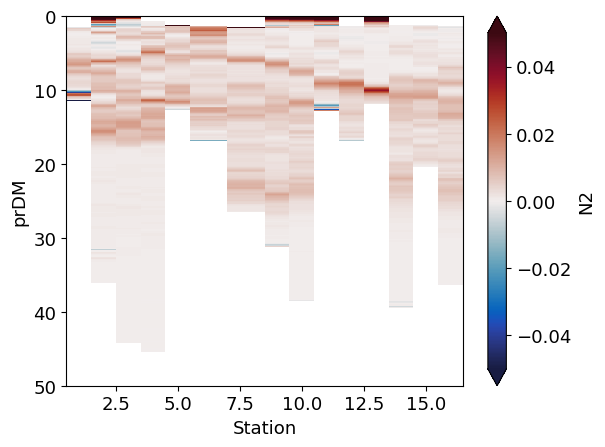

In [101]:
DS['N2'].plot(x='Station',ylim=(50,0),vmax=.05,vmin=-.05,cmap='cmo.balance')

(-0.01, 0.1)

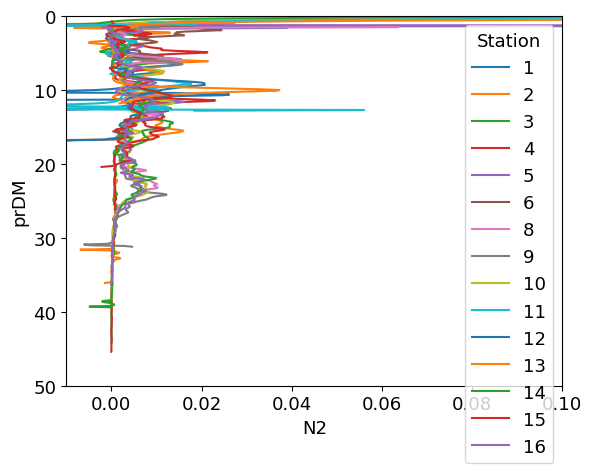

In [118]:
DS['N2'].plot(y='prDM',ylim=(50,0),hue='Station')
plt.xlim(-1e-2,1e-1)